# Table of Contents
### - Correlation heatmap (matplotlib)
### - Correlation heatmap (seaborn)
### - Scatterplots
### - Pair plots
### - Correlation analysis
### - Current hypotheses

# Notebook Setup

In [1]:
# Import related libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Import cleaned dataset
path = r'C:\Users\mmreg\OneDrive\Desktop\Data Analytics Course Work\Data Immersion\Tasks\08-2022 Exploratory Analytics Project\02 Data'

In [3]:
df = pd.read_csv(os.path.join(path, 'Prepared', 'citibike_clean.csv'), index_col = False)

In [4]:
df.head()

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  LnQzQk    16013     Mon          18   9/9/2013 18:18               523   
1  IL9boN    15230     Thu          18  9/12/2013 18:38               257   
2  46clGB    17942     Wed          19  9/18/2013 19:44               479   
3  v7vdFt    19683     Sat          11  9/28/2013 11:54               527   
4  VGBsb5    18024     Sat          18   9/7/2013 18:08               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

          end_time  end_station_id     end_station_name  end_station_latitude  \
0   9/9/2013 18:35             334      W 20 St & 7 Ave             40.742388   
1  9/12/2013 18:48             236  St Marks Pl & 2 Ave             40.728419   
2  9/18/2013 19:50             513     W 56 St & 10 Ave             40.768254   
3  9/28/2013 12:03             441      E 52 St & 2 Ave             40.756014   
4   9/7/2013 18:46             476      E 31 St & 3 Ave             40.743943   

   end_station_longitude  trip_duration      subscriber  birth_year  gender  \
0             -73.997262            993      Subscriber      1968.0       2   
1             -73.987140            581      Subscriber      1983.0       1   
2             -73.988639            361      Subscriber      1989.0       1   
3             -73.967416            561      Subscriber      1988.0       2   
4             -73.979661           2296  Non-Subscriber         NaN       0   

  customer_volume  
0     High Volume  
1     High Volume  
2     High Volume  
3   Normal Volume  
4     High Volume

In [7]:
matplotlib.__version__

'3.5.1'

In [8]:
%matplotlib inline

# Question 2

## Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

In [14]:
# Create dataframe with columns removed for analysis
# We will not need the trip_id, bike_id, start_station_name, end_station_name, start_station_id, end_station_id, end_station_latitude, end_station_longitude, weekday, subscriber, customer_volume or end_time
df_vis = df.drop(columns = ['trip_id', 'bike_id', 'start_station_name', 'end_station_name', 'start_station_id', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'weekday', 'subscriber', 'end_time', 'customer_volume'])

In [15]:
# Ensure successful column drop
df_vis.head()

start_hour       start_time  start_station_latitude  \
0          18   9/9/2013 18:18               40.754666   
1          18  9/12/2013 18:38               40.719392   
2          19  9/18/2013 19:44               40.760193   
3          11  9/28/2013 11:54               40.743156   
4          18   9/7/2013 18:08               40.750450   

   start_station_longitude  trip_duration  birth_year  gender  
0               -73.991382            993      1968.0       2  
1               -74.002472            581      1983.0       1  
2               -73.991255            361      1989.0       1  
3               -73.974347            561      1988.0       2  
4               -73.994811           2296         NaN       0

In [16]:
df_vis.shape
# With 11 columns dropped, the shape should be (50000,7). We are good to go.

(50000, 7)

# Question 3

## Create a correlation matrix heatmap (colored).

In [17]:
# View correlation table to ensure data is ready for heatmap
df_vis.corr()

start_hour  start_station_latitude  \
start_hour                 1.000000               -0.009121   
start_station_latitude    -0.009121                1.000000   
start_station_longitude   -0.045734                0.211969   
trip_duration              0.040870               -0.025321   
birth_year                 0.064253               -0.045421   
gender                    -0.013775               -0.012483   

                         start_station_longitude  trip_duration  birth_year  \
start_hour                             -0.045734       0.040870    0.064253   
start_station_latitude                  0.211969      -0.025321   -0.045421   
start_station_longitude                 1.000000      -0.007220    0.030340   
trip_duration                          -0.007220       1.000000   -0.047118   
birth_year                              0.030340      -0.047118    1.000000   
gender                                  0.011487      -0.157944    0.070342   

                           gender  
start_hour              -0.013775  
start_station_latitude  -0.012483  
start_station_longitude  0.011487  
trip_duration           -0.157944  
birth_year               0.070342  
gender                   1.000000

Text(0.5, 1.0, 'Correlation Matrix')

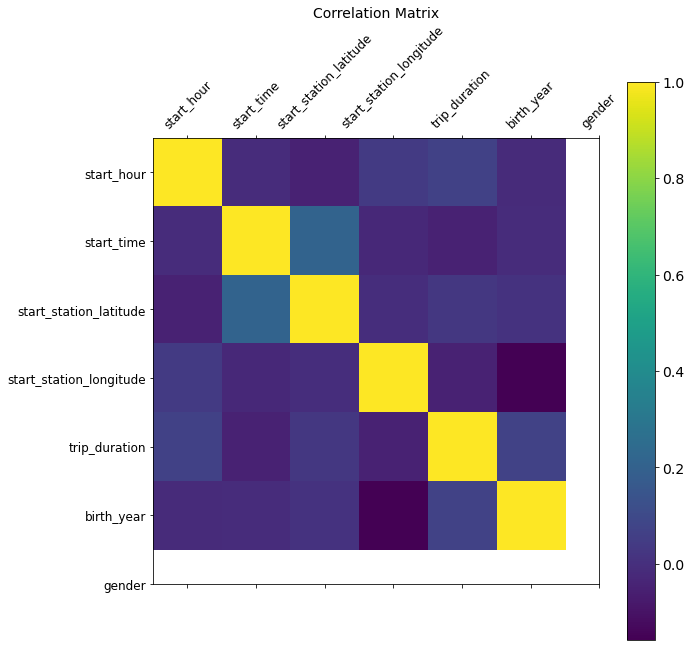

In [18]:
# Create heatmap using matplotlib
f = plt.figure(figsize=(10, 10))
plt.matshow(df_vis.corr(), fignum=f.number)
plt.xticks(range(df_vis.shape[1]), df_vis.columns, fontsize=12, rotation=45)
plt.yticks(range(df_vis.shape[1]), df_vis.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

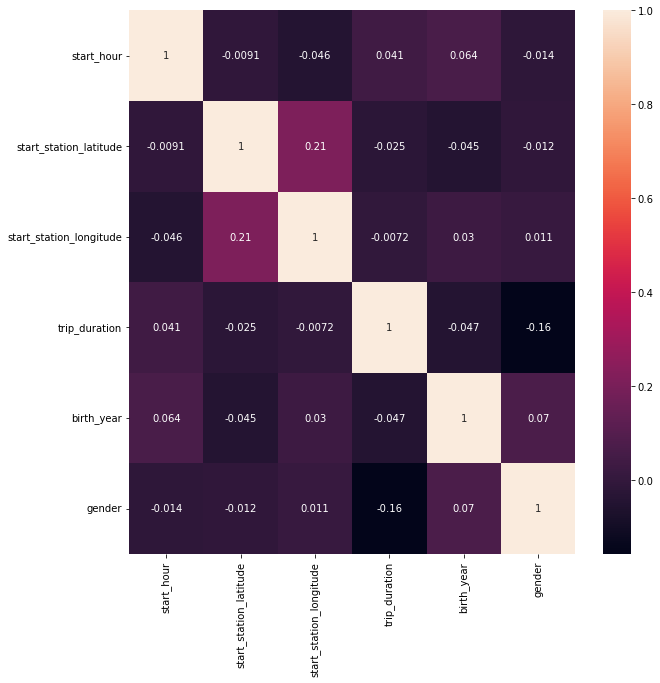

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_vis.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### We can see that most variables correlations are weak at best. The top correlations would be longitude/latitude, trip_duration/gender, birth_year/gender, and birth_year/start_hour. All other correlations are too weak to be considered relevant. For the purpose of this task, I will consider anything above 0.05 a weak relationship to provide me with variables to complete the rest of the task. The relationships are defined below:
#### - This correlation would be defined as weak and positive. This simply tells us that the locations occur within a very small portion of the globe: New York City. Longitude and latitude will clearly have a commonality and thus a correlation: they are locations within a city, a small area in the scope of the world and would likely be close to one another.
#### - This is a weak, negative correlation. When we define the gender scale of the data (0: undefined, 1: male, 2: female) it tells us an interesting story. From what the heatmap shows us, the longer the trip duration, the more likely the gender of the traveler is male or unknown.
#### - This is a weak, positive correlation. Again we use the definition of the numerical values of the gender column to draw analysis. According to the heat map, the younger customers that use this service are more likely to be female.
#### - We can hypothesize that the later the trip starts, the younger the customer on the trip is. We see this from the weak positive correlation of the variables. 

# Question 4
## Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

In [20]:
# Create scatterplot for the longitude/latitude relationship
sns.lmplot(x = 'start_station_longitude', y = 'start_station_latitude', data = df_vis)

### While it may not seem like it tells us much, it actually provides us with some quality information. We can see three distinct clusters within the scatterplot, and knowing what longitude and latitude tell us can deduce that there are three distinct locations where the citibikes are most commonly used. This could be useful information for deployment of bikes - particularly when weekday and hour are incorporated - but the linear regression line sadly tells us little.

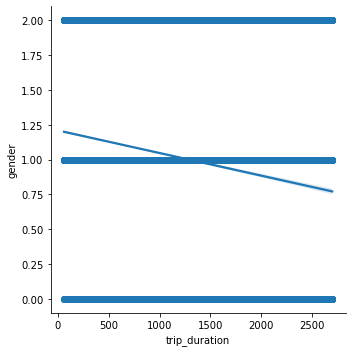

In [21]:
# Create scatterplot for the trip_duration/gender relationship
sns.lmplot(x = 'trip_duration', y = 'gender', data = df_vis)

In [22]:
# Create variable for trip duration in minutes to try and clear up visual
df_vis['trip_duration_min'] = df_vis['trip_duration']/60

In [23]:
df_vis.head()

start_hour       start_time  start_station_latitude  \
0          18   9/9/2013 18:18               40.754666   
1          18  9/12/2013 18:38               40.719392   
2          19  9/18/2013 19:44               40.760193   
3          11  9/28/2013 11:54               40.743156   
4          18   9/7/2013 18:08               40.750450   

   start_station_longitude  trip_duration  birth_year  gender  \
0               -73.991382            993      1968.0       2   
1               -74.002472            581      1983.0       1   
2               -73.991255            361      1989.0       1   
3               -73.974347            561      1988.0       2   
4               -73.994811           2296         NaN       0   

   trip_duration_min  
0          16.550000  
1           9.683333  
2           6.016667  
3           9.350000  
4          38.266667

In [24]:
# Try visualization with new variable
sns.lmplot(x = 'gender', y = 'trip_duration_min', data = df_vis)

### The scatter plot is less scatter and more tightly compacted points in three distinct rows, but it does tell us that the longer the trip, the more likely the customer gender is undefined or male. However looking at the descriptive statistics of the gender variable we see that more men use the service than both female and undefined combined. So this leads me to assume that the large gender disparity is causing this slant.

# Question 5
## Create a pair plot of the entire data set.

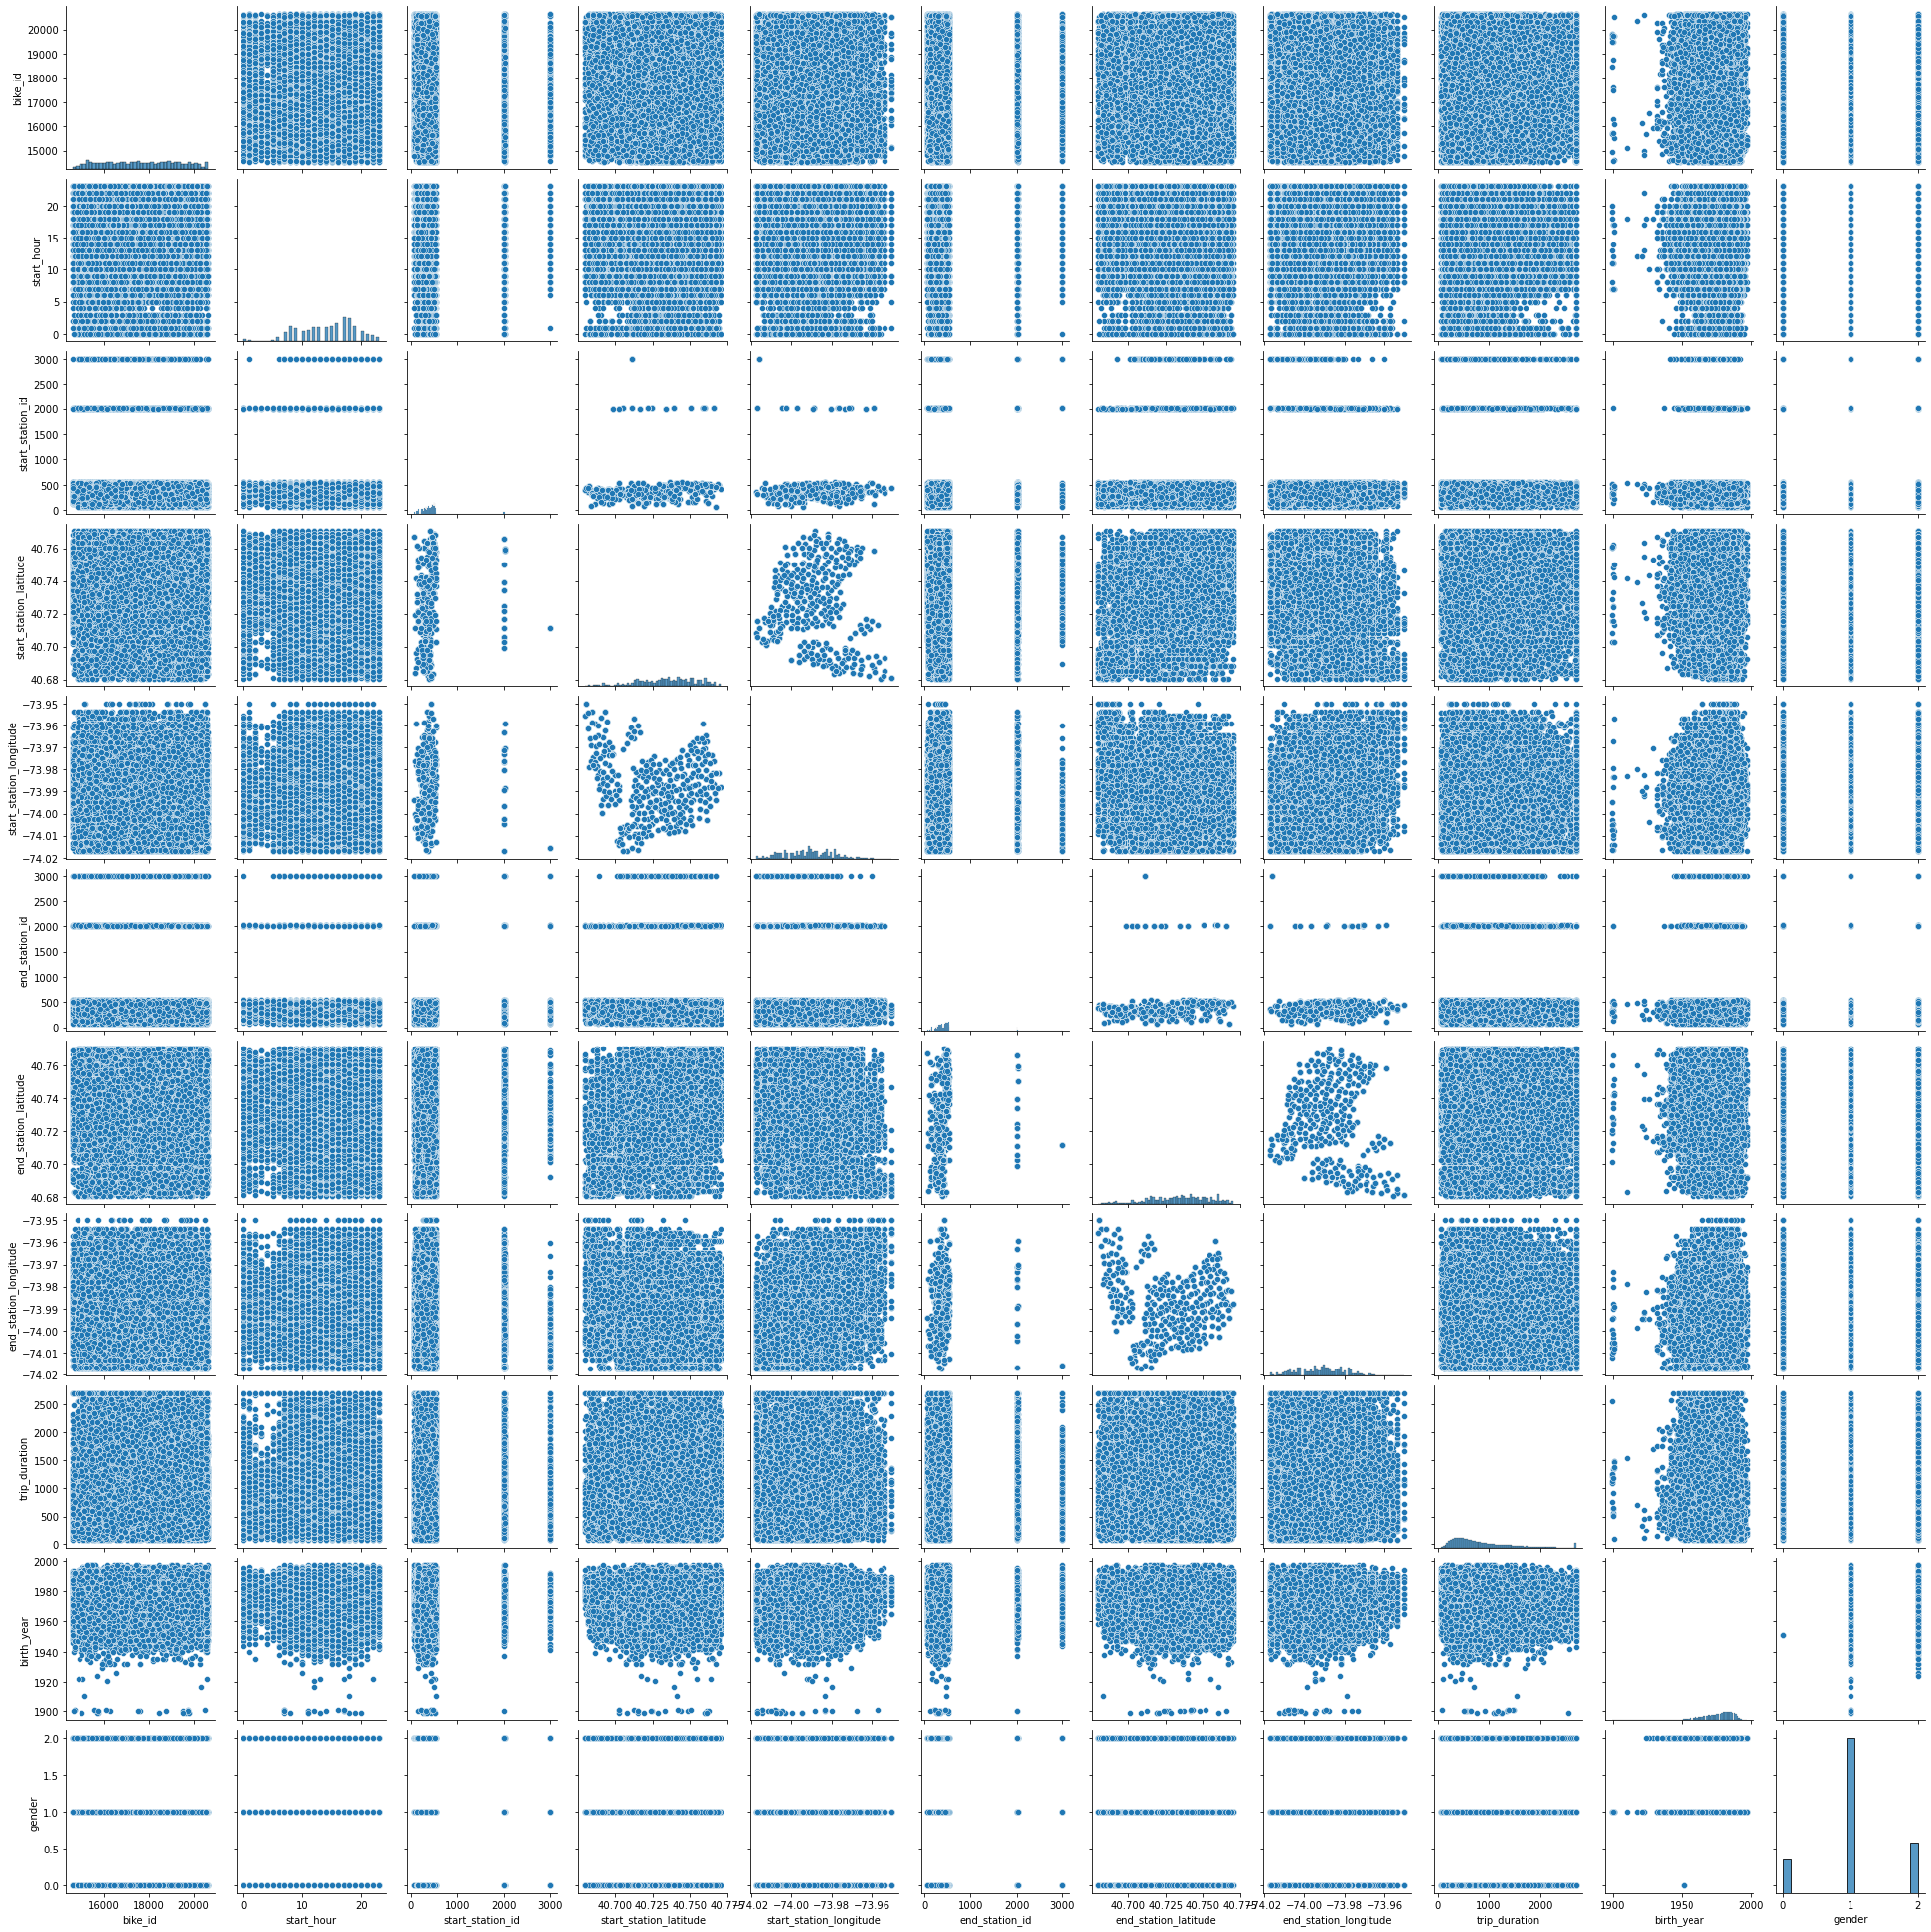

In [25]:
# Create pair plot of entire data set
g = sns.pairplot(df)

### This seems rather rediculous, though asked for so I included it. I will create another one with only the subset that is used for the previous heatmap visualization

In [26]:
g_vis = sns.pairplot(df_vis)

### Overall some compelling things to observe here. The gender disparity is good information to go on, and will be immediately useful for the company. One thing we will need to look into are the birth years; I see a lot of plots of those born in the 1900s. I also see that those that put the 1900s year in their profile also are listed as undefined gender, which tells me they simply did not fill out the customer profile. Logic tells me that this is a default number given in the app, but I would need to contact stakeholders to make sure this is accurate. Later on, I would like to look at the trip duration and start hour of the trips in relation to gender and whether they are a subscriber or not, as this could give us valuable insight on the customer base and how to better serve them.

# Question 6
## Create a categorical plot and interpret the results.

### I will make a categorical plot of the trip duration (in minutes), and interpret the results.

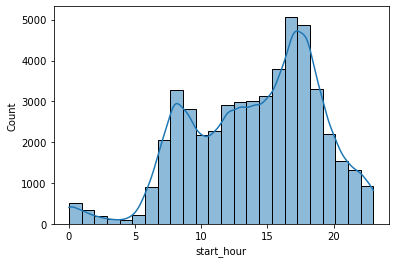

In [27]:
# Create categorical plot of start_hour
g_4 = sns.histplot(df_vis['start_hour'], bins = 24, kde = True)
# 16 - 19, 8 high / 7 - 20 normal / else low

### From the visualization, we can start to add a flag for busy hours of operation for the service. We can say that 8a as well as 4p - 7p are high volume, 7a - 8a, 9a - 4p, 7p-9p are normal volume, and all other hours are low volume. I am going to create a variable that categorizes these times for future analysis.

In [28]:
# Insert new 'customer_volume' variable
df.loc[df['start_hour'] > 23, 'customer_volume'] = 'Low Volume'

In [29]:
df.loc[df['start_hour'] < 7, 'customer_volume'] = 'Low Volume'

In [30]:
df.loc[df['start_hour'] == 7 , 'customer_volume'] = 'Normal Volume'

In [31]:
df.loc[(df['start_hour'] >= 9) & (df['start_hour'] < 16), 'customer_volume'] = 'Normal Volume'

In [32]:
df.loc[(df['start_hour'] >= 20) & (df['start_hour'] <= 21), 'customer_volume'] = 'Normal Volume'

In [33]:
df.loc[(df['start_hour'] >= 16) & (df['start_hour'] <= 19), 'customer_volume'] = 'High Volume'

In [34]:
df.loc[df['start_hour'] == 8 , 'customer_volume'] = 'High Volume'

In [35]:
df['customer_volume'].value_counts(dropna = False)

Normal Volume    25052
High Volume      20319
Low Volume        4629
Name: customer_volume, dtype: int64

In [36]:
# Confirm addition of derived variable
df.head()

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  LnQzQk    16013     Mon          18   9/9/2013 18:18               523   
1  IL9boN    15230     Thu          18  9/12/2013 18:38               257   
2  46clGB    17942     Wed          19  9/18/2013 19:44               479   
3  v7vdFt    19683     Sat          11  9/28/2013 11:54               527   
4  VGBsb5    18024     Sat          18   9/7/2013 18:08               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

          end_time  end_station_id     end_station_name  end_station_latitude  \
0   9/9/2013 18:35             334      W 20 St & 7 Ave             40.742388   
1  9/12/2013 18:48             236  St Marks Pl & 2 Ave             40.728419   
2  9/18/2013 19:50             513     W 56 St & 10 Ave             40.768254   
3  9/28/2013 12:03             441      E 52 St & 2 Ave             40.756014   
4   9/7/2013 18:46             476      E 31 St & 3 Ave             40.743943   

   end_station_longitude  trip_duration      subscriber  birth_year  gender  \
0             -73.997262            993      Subscriber      1968.0       2   
1             -73.987140            581      Subscriber      1983.0       1   
2             -73.988639            361      Subscriber      1989.0       1   
3             -73.967416            561      Subscriber      1988.0       2   
4             -73.979661           2296  Non-Subscriber         NaN       0   

  customer_volume  
0     High Volume  
1     High Volume  
2     High Volume  
3   Normal Volume  
4     High Volume

In [37]:
# Create categorical plot of trip_duration_min and start_hour, with color categorization of gender
sns.set(style="ticks")
g_3 = sns.catplot(x="start_hour", y="trip_duration_min", hue="gender", data=df_vis)

### This is an interesting visual. We can see a small glimps into the popular times for the service through the density of the plots. However, what's more interesting is that even though men use the service much more often than women, their trips are on average much shorter. "Undefined" gender shows no patterns nor correlations.

# Question 7
## Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### Some of the question from the previous task that have been answered:
#### "Are there certain areas within New York that see the most usage of the service?" Yes, as seen in the correlation plot, we can determine that there are three distinct 'zones' within which the customers start their rides. Further analysis will need to see where they finish and if this zone plot changes, but we can determine almost precisely where the bikes are used most.
#### "What is the age demographic of the most common customers?" We can see that the most common customers are 70 and younger, with very few older than this.
#### "Is there a correlation between age and how long the trip is?" No strong correlation can be found; however, we do see that older customers tend to use the service less, especially after the age of 60. This could be useful information.
### Some new questions that have arisen:
#### - Why do women tend to use bikes for longer amount of times?
#### - Do the customer volume ranges change depending on day of the week?
#### - There seem to be some pockets within the longitude and latitude charts when correlated with start hour. Why is this?


# Question 8
## Define any hypotheses that you can at this point.

### There are a couple hypotheses that I can think of from the data provided:
### - If you are a subscriber, then your trip lengths will be shorter
### - If you are male, you will have shorter trips
### - If it is a weekday, you will have shorter trip duration

In [38]:
#Export datasets for future use
df.to_csv(os.path.join(path, 'Prepared', 'citibike_clean.csv'))